#NETFLIX DATASET

In [ ]:
#Loading the dataset to clean and analyze it

import pandas as pd

# Load the dataset
xp = pd.read_csv('/content/drive/MyDrive/anet/netflix_titles.csv')
xp



,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
xp.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#checking for null values

xp.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [ ]:
# Dealing with the missing values

xp['director'] = xp['director'].fillna('Unknown')
xp['cast'] = xp['cast'].fillna('Unknown')
xp['country'] = xp['country'].fillna('Unknown')

xp.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

print("Missing values handled for 'director', 'cast', 'country', 'date_added', 'rating', and 'duration'.")

Missing values handled for 'director', 'cast', 'country', 'date_added', 'rating', and 'duration'.


In [ ]:
xp.shape

(8790, 12)

In [ ]:
# analyzing content distribution

cont_type = xp['type'].value_counts()
cont_type



,count
type,
Movie,6126
TV Show,2664


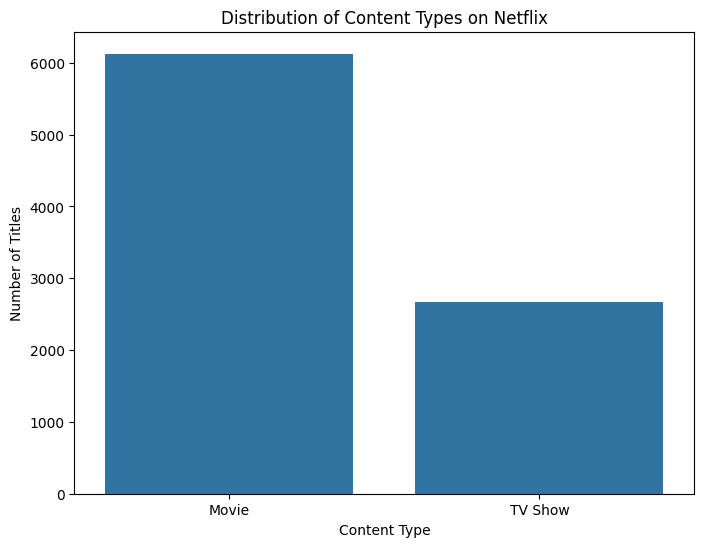

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for content type distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=cont_type.index, y=cont_type.values)
plt.title('Distribution of Content Types on Netflix')

plt.xlabel('Content Type')
plt.ylabel('Number of Titles')
plt.show()

In [ ]:
# directors with the most films

td = xp['director'].value_counts()
td

,count
director,
Unknown,2621
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
...,...
Marek Kanievska,1
Tiffanie Hsu,1
Marina Zenovich,1


In [ ]:
td.head(10)

,count
director,
Unknown,2621
Rajiv Chilaka,19
"Raúl Campos, Jan Suter",18
Suhas Kadav,16
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Jay Chapman,12
Youssef Chahine,12


In [ ]:
# Filter for movies and count releases per year
movies_by_year = xp[xp['type'] == 'Movie']['release_year'].value_counts().sort_index()



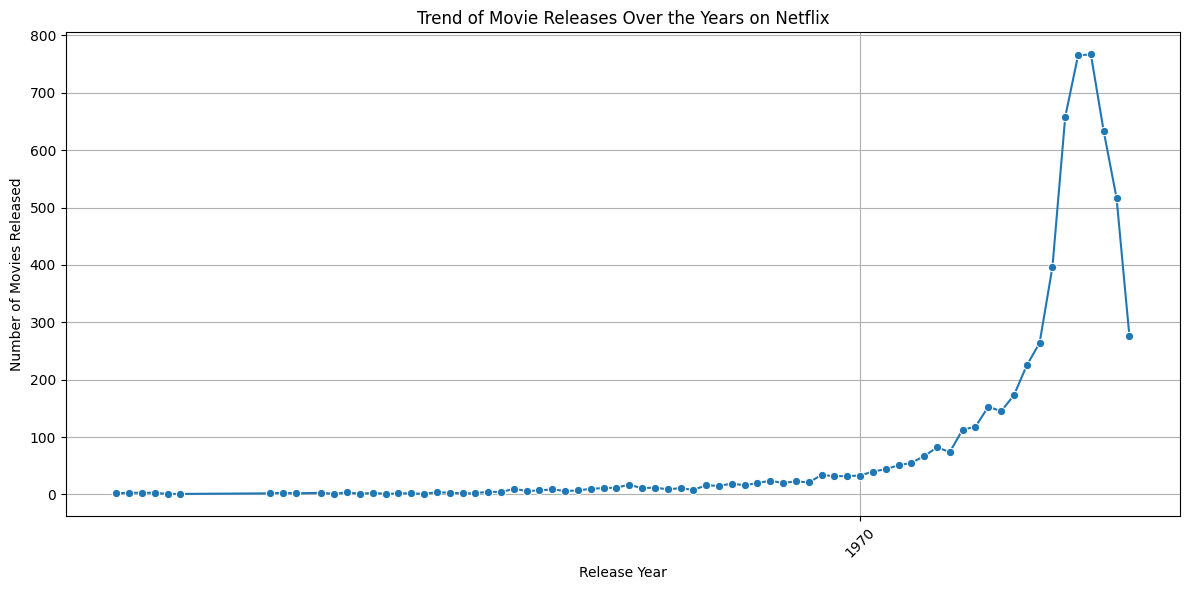

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x=movies_by_year.index, y=movies_by_year.values, marker='o')
plt.title('Trend of Movie Releases Over the Years on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies Released')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
movies_by_year.tail()

,count
release_year,
1970-01-01 00:00:00.000002017,765
1970-01-01 00:00:00.000002018,767
1970-01-01 00:00:00.000002019,633
1970-01-01 00:00:00.000002020,517
1970-01-01 00:00:00.000002021,277


In [ ]:
# looking at the countries with the highet production of tv films

tv = xp[xp['type'] == 'TV Show']['country'].value_counts()
tv.head(16)

,count
country,
United States,754
Unknown,390
United Kingdom,212
Japan,167
South Korea,158
India,79
Taiwan,68
Canada,59
France,49


In [ ]:
xp['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [39]:
# Calculate the distribution of ratings
rat = xp['rating'].value_counts()

# Display the counts
display(rat)


,count
rating,
TV-MA,3205
TV-14,2157
TV-PG,861
R,799
PG-13,490
TV-Y7,333
TV-Y,306
PG,287
TV-G,220


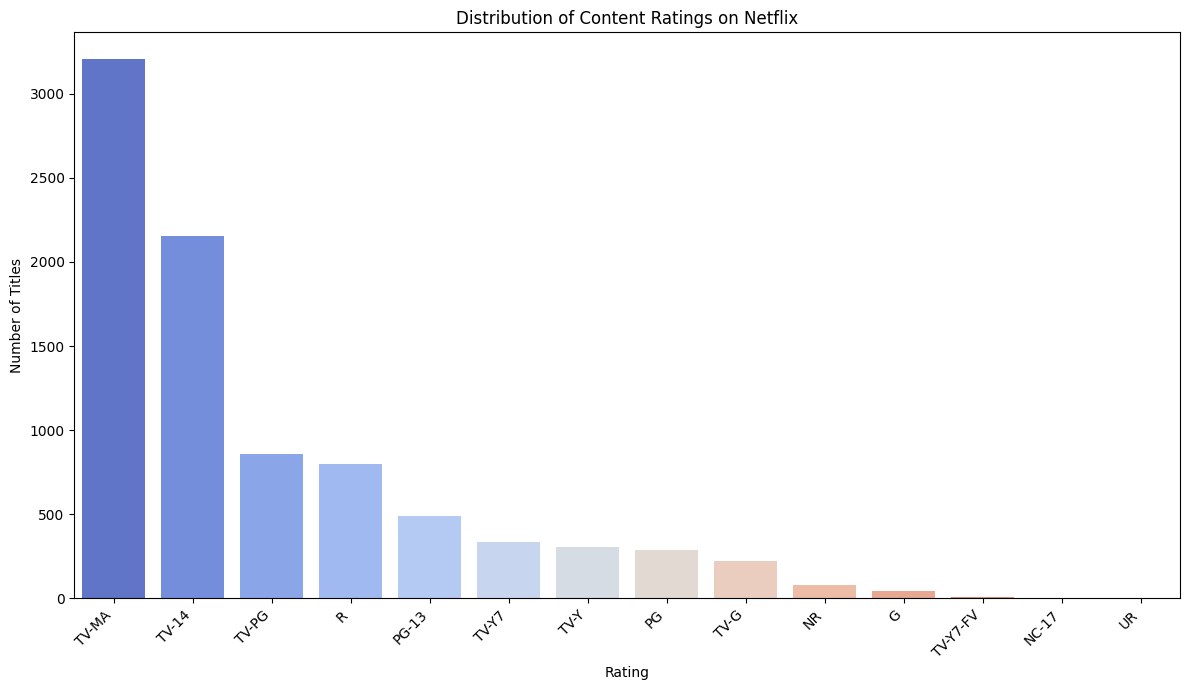

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.barplot(x=rat.index, y=rat.values, hue=rat.index, palette='coolwarm', legend=False)
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [44]:
# country with the most movies in the TV-MA category

tv_ma = xp[(xp['type'] == 'Movie') & (xp['rating'] == 'TV-MA')]
cc = tv_ma['country'].value_counts()
display(cc.head(9))



,count
country,
United States,613
India,215
Unknown,138
United Kingdom,87
Spain,81
Mexico,49
France,48
Turkey,44
Canada,42
